In [2]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:36191")
client

<Client: 'tcp://127.0.0.1:36191' processes=4 threads=12, memory=31.22 GiB>

In [3]:
# numpy/scipy stuff
import numpy as np

# matplotlib stuff
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from matplotlib import colors
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyBboxPatch
import matplotlib as mpl
import matplotlib.lines as mlines

# data sci stuff
import xarray as xr
import pandas as pd
from xarrayutils.plotting import linear_piecewise_scale

# system stuff
#import os
#import sys
#import glob
#import fnmatch

# netcdf stuff
from netCDF4 import Dataset
import datetime
import cftime
import nc_time_axis

# widgets stuff
import ipywidgets as widgets
from ipywidgets import interact,interactive

# dask stuff
from dask.diagnostics import Profiler, ResourceProfiler, CacheProfiler
from dask.diagnostics import visualize

# bokeh for dask extension
#import bokeh
#from bokeh.io import output_notebook
#output_notebook()

from matplotlib import rcParams

import cartopy.crs as ccrs

#from eofs.xarray import Eof
#from eofs.examples import example_data_path

#import seaborn as sns
#import scipy.stats as sc
#from scipy import signal
#import statsmodels.graphics.gofplots as sm

# there is something wrong with the conda install ,need to set the enviroment
#%env ESMFMKFILE=/home/guido/anaconda3/lib/esmf.mk
import os
os.environ['ESMFMKFILE']="/home/guido/miniforge3/lib/esmf.mk"
import xesmf as xe
%matplotlib inline

ERROR 1: PROJ: proj_create_from_database: Open of /home/guido/miniforge3/share/proj failed


In [4]:
def setaxesfsize(axl,fontsize):
    ticklabelbot = axl.get_xticklabels()
    ticklabelleft = axl.get_yticklabels()
    for labelx in ticklabelbot:
        labelx.set_fontsize(fontsize)
#    i=0
    for labely in ticklabelleft:
#        if i != 0:
            labely.set_fontsize(fontsize)


In [5]:
def setaxeslsize(axl,fontsize, xlabel, ylabel, labsize):
    ticklabelbot = axl.get_xticklabels()
    ticklabelleft = axl.get_yticklabels()
    for labelx in ticklabelbot:
        labelx.set_fontsize(fontsize)
#    i=0
    for labely in ticklabelleft:
#        if i != 0:
            labely.set_fontsize(fontsize)
    
    axl.set_xlabel(xlabel, size=labsize)
    axl.set_ylabel(ylabel, size=labsize)


In [6]:
def xrspinloader(bdir, case, model, var, tchunk):
    fname = bdir + "/" + case + "/" + model + "/spin/" + case + "_" + model + "_" + var + "_spinup.nc"
    print("loading...", fname)
    xrvar = xr.open_dataset(fname, engine='netcdf4', chunks={'time': tchunk})
    return xrvar[var]

def xrannloader(fname):
    xrvar = xr.open_dataset(fname, engine='netcdf4')
    return xrvar


In [7]:
basedir = "/mdata/pproc/"

gcase_ebm = "g1850ecoctrl1deg"
gcase_noebm = "g1850econoest1deg"

#gebm_decavg_spin_MOC = xrspinloader(basedir, gcase_ebm, "ocn", "MOC", 24)
#gnoebm_decavg_spin_MOC = xrspinloader(basedir, gcase_noebm, "ocn", "MOC", 24)

bcase_ebm1 = "B1850_BPRP_f19_g17_prod"
bcase_ebm2 = "B1850_BPRP_f19_g17_ref"
bcase_noebm = "B1850_BPRP_f19_g17_noest"

#bebm1_decavg_spin_MOC = xrspinloader(basedir, bcase_ebm1, "ocn", "MOC", 24)
#bebm2_decavg_spin_MOC = xrspinloader(basedir, bcase_ebm2, "ocn", "MOC", 24)
#bnoebm_decavg_spin_MOC = xrspinloader(basedir, bcase_noebm, "ocn", "MOC", 24)


gebm_annavg_spin_MOC = xrannloader("/mdata/pproc/g1850ecoctrl1deg/ocn/spin/g1850ecoctrl1deg_ocn_MOC_spinup_ANN.nc")
gnoebm_annavg_spin_MOC = xrannloader("/mdata/pproc/g1850econoest1deg/ocn/spin/g1850econoest1deg_ocn_MOC_spinup_ANN.nc")
bebm1_annavg_spin_MOC = xrannloader("/mdata/pproc/B1850_BPRP_f19_g17_prod/ocn/spin/B1850_BPRP_f19_g17_prod_ocn_MOC_spinup_ANN.nc")
bebm2_annavg_spin_MOC = xrannloader("/mdata/pproc/B1850_BPRP_f19_g17_ref/ocn/spin/B1850_BPRP_f19_g17_ref_ocn_MOC_spinup_ANN.nc")
bnoebm_annavg_spin_MOC = xrannloader("/mdata/pproc/B1850_BPRP_f19_g17_noest/ocn/spin/B1850_BPRP_f19_g17_noest_ocn_MOC_spinup_ANN.nc")


In [8]:
bebm1_annavg_spin_MOC

<xarray.Dataset>
Dimensions:         (moc_comp: 3, lat_aux_grid: 395, moc_z: 61, time: 391,
                     transport_reg: 2)
Coordinates:
    moc_components  (moc_comp) |S384 ...
  * lat_aux_grid    (lat_aux_grid) float32 -79.49 -78.95 -78.42 ... 89.47 90.0
  * moc_z           (moc_z) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05 5.5e+05
  * time            (time) object 0001-12-31 00:00:00 ... 0391-12-31 00:00:00
Dimensions without coordinates: moc_comp, transport_reg
Data variables:
    MOC             (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...

In [9]:
bebm2_annavg_spin_MOC

<xarray.Dataset>
Dimensions:         (moc_comp: 3, lat_aux_grid: 395, moc_z: 61, time: 181,
                     transport_reg: 2)
Coordinates:
    moc_components  (moc_comp) |S384 ...
  * lat_aux_grid    (lat_aux_grid) float32 -79.49 -78.95 -78.42 ... 89.47 90.0
  * moc_z           (moc_z) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05 5.5e+05
  * time            (time) object 0391-12-31 00:00:00 ... 0571-12-31 00:00:00
Dimensions without coordinates: moc_comp, transport_reg
Data variables:
    MOC             (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...

In [10]:
def get_amoc_max(mocarray):
    latmin=20.
    latmax=50.
    zmin=50000.
    zmax=200000.
    region = 1
    moc_max_em = (mocarray
               .sel(transport_reg=region, moc_comp=0, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_ei = (mocarray
               .sel(transport_reg=region, moc_comp=1, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_sm = (mocarray
               .sel(transport_reg=region, moc_comp=2, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max = (moc_max_em +  moc_max_ei +  moc_max_sm).max(dim=('lat_aux_grid', 'moc_z'))
 
    return moc_max

def get_aabw_max(mocarray):
    latmin=-80.
    latmax=0.
    zmin=300000.
    zmax=400000.
    region = 0
    moc_max_em = (mocarray
               .sel(transport_reg=region, moc_comp=0, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_ei = (mocarray
               .sel(transport_reg=region, moc_comp=1, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_sm = (mocarray
               .sel(transport_reg=region, moc_comp=2, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max = (moc_max_em +  moc_max_ei +  moc_max_sm).min(dim=('lat_aux_grid', 'moc_z'))
 
    return moc_max

def get_atl_aabw_max(mocarray):
    latmin=-40.
    latmax=0.
    zmin=200000.
    zmax=400000.
    region = 1
    moc_max_em = (mocarray
               .sel(transport_reg=region, moc_comp=0, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_ei = (mocarray
               .sel(transport_reg=region, moc_comp=1, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_sm = (mocarray
               .sel(transport_reg=region, moc_comp=2, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max = (moc_max_em +  moc_max_ei +  moc_max_sm).min(dim=('lat_aux_grid', 'moc_z'))

    return moc_max

In [11]:
## look a AMOC at 20 N
def get_amoc_max_20N(mocarray):
    latmin=18.
    latmax=22.
    zmin=50000.
    zmax=200000.
    region = 1
    moc_max_em = (mocarray
               .sel(transport_reg=region, moc_comp=0, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_ei = (mocarray
               .sel(transport_reg=region, moc_comp=1, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_sm = (mocarray
               .sel(transport_reg=region, moc_comp=2, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max = (moc_max_em +  moc_max_ei +  moc_max_sm).max(dim=('lat_aux_grid', 'moc_z'))
 
    return moc_max


In [12]:
## look a AMOC at RAPID: 26 N
def get_amoc_max_26N(mocarray):
    latmin=25.8
    latmax=27.
    zmin=50000.
    zmax=200000.
    region = 1
    moc_max_em = (mocarray
               .sel(transport_reg=region, moc_comp=0, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_ei = (mocarray
               .sel(transport_reg=region, moc_comp=1, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_sm = (mocarray
               .sel(transport_reg=region, moc_comp=2, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max = (moc_max_em +  moc_max_ei +  moc_max_sm).max(dim=('lat_aux_grid', 'moc_z'))
 
    return moc_max


In [13]:
def get_amoc_max_where(mocarray):
    latmin=20.
    latmax=50.
    zmin=50000.
    zmax=200000.
    region = 1
    moc_max_em = (mocarray
               .sel(transport_reg=region, moc_comp=0, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_ei = (mocarray
               .sel(transport_reg=region, moc_comp=1, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_sm = (mocarray
               .sel(transport_reg=region, moc_comp=2, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_grid = (moc_max_em +  moc_max_ei +  moc_max_sm)
    indmax = moc_max_grid.fillna(0.0).argmax(dim=('lat_aux_grid', 'moc_z'))
    latmax = np.array([ moc_max_grid.lat_aux_grid[indmax["lat_aux_grid"][i]].data for i in range(len(indmax["lat_aux_grid"])) ])
    latmax_xr = xr.DataArray(latmax, coords={'time': moc_max_grid.time},  dims=["time"], name='MOCMAXIND')
    return latmax_xr, indmax


In [14]:
def get_aabw_max_where(mocarray):
    latmin=-80.
    latmax=0.
    zmin=300000.
    zmax=400000.
    region = 0
    moc_max_em = (mocarray
               .sel(transport_reg=region, moc_comp=0, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_ei = (mocarray
               .sel(transport_reg=region, moc_comp=1, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_sm = (mocarray
               .sel(transport_reg=region, moc_comp=2, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_grid = (moc_max_em +  moc_max_ei +  moc_max_sm)
    # we are looking for maximum negative values (stronger AABW)
    indmin = moc_max_grid.fillna(0.0).argmin(dim=('lat_aux_grid', 'moc_z'))
    latmin = np.array([ moc_max_grid.lat_aux_grid[indmin["lat_aux_grid"][i]].data for i in range(len(indmin["lat_aux_grid"])) ])
    latmin_xr = xr.DataArray(latmin, coords={'time': moc_max_grid.time},  dims=["time"], name='AABWMAXIND')
    return latmin_xr, indmin


In [15]:
mocdata_gebm_max = get_amoc_max(gebm_annavg_spin_MOC)
mocdata_gnoebm_max = get_amoc_max(gnoebm_annavg_spin_MOC)
aabwdata_gebm_max = get_aabw_max(gebm_annavg_spin_MOC)
aabwdata_gnoebm_max = get_aabw_max(gnoebm_annavg_spin_MOC)



In [16]:
mocdata_gebm_max_20N = get_amoc_max_20N(gebm_annavg_spin_MOC)
mocdata_gnoebm_max_20N = get_amoc_max_20N(gnoebm_annavg_spin_MOC)

In [17]:
mocdata_gebm_max_26N = get_amoc_max_26N(gebm_annavg_spin_MOC)
mocdata_gnoebm_max_26N = get_amoc_max_26N(gnoebm_annavg_spin_MOC)


In [18]:
mocdata_bebm1_max = get_amoc_max(bebm1_annavg_spin_MOC)
mocdata_bebm2_max = get_amoc_max(bebm2_annavg_spin_MOC)
mocdata_bnoebm_max = get_amoc_max(bnoebm_annavg_spin_MOC)
aabwdata_bebm1_max = get_aabw_max(bebm1_annavg_spin_MOC)
aabwdata_bebm2_max = get_aabw_max(bebm2_annavg_spin_MOC)
aabwdata_bnoebm_max = get_aabw_max(bnoebm_annavg_spin_MOC)

In [19]:
mocdata_bebm1_max_20N = get_amoc_max_20N(bebm1_annavg_spin_MOC)
mocdata_bebm2_max_20N = get_amoc_max_20N(bebm2_annavg_spin_MOC)
mocdata_bnoebm_max_20N = get_amoc_max_20N(bnoebm_annavg_spin_MOC)


In [20]:
mocdata_bebm1_max_26N = get_amoc_max_26N(bebm1_annavg_spin_MOC)
mocdata_bebm2_max_26N = get_amoc_max_26N(bebm2_annavg_spin_MOC)
mocdata_bnoebm_max_26N = get_amoc_max_26N(bnoebm_annavg_spin_MOC)


In [21]:
mocdata_gebm_max

<xarray.Dataset>
Dimensions:         (time: 571)
Coordinates:
  * time            (time) object 0001-12-31 00:00:00 ... 0571-12-31 00:00:00
    moc_components  |S384 b'Submeso'
Data variables:
    MOC             (time) float32 23.37 22.01 22.09 22.8 ... 27.49 27.42 24.64

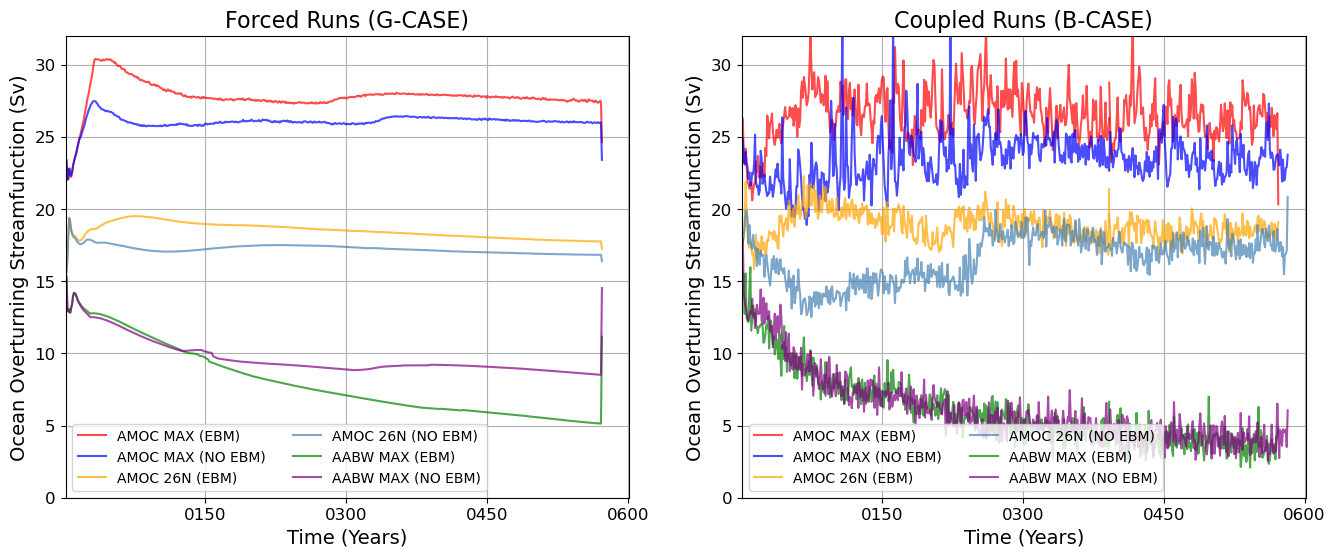

In [22]:
fig = plt.figure(figsize=(16,6))

ax0 = plt.subplot(121)
ax1 = plt.subplot(122)

amocmaxebmcol = "red"
amocmaxnoebmcol = "blue"
amoc26nebmcol = "orange"
amoc26nnoebmcol = "steelblue"
aabwmaxebmcol = "green"
aabwmaxnoebmcol = "purple"

legfs = 10 # leg size
axlbfs = 14 # axes labels size
tfs = 16 # title size
#tmin = 0
#tmax = 219000+365
#tunit = 'days since 0001-01-01 00:00:00'
#xmin = cftime.num2date(tmin, tunit)
#xmax = cftime.num2date(tmax, tunit)
xmin = cftime.num2date(0*365, 'days since 0001-01-01 00:00:00', calendar='noleap')
xmax = cftime.num2date(600*365, 'days since 0001-01-01 00:00:00', calendar='noleap')

#xmin = cftime.datetime("0000-01-01 00:00:00", calendar='no_leap')
mocdata_gebm_max.MOC.plot(ax = ax0, label='AMOC MAX (EBM)', color=amocmaxebmcol, alpha=0.7)
mocdata_gnoebm_max.MOC.plot(ax = ax0, label='AMOC MAX (NO EBM)', color=amocmaxnoebmcol, alpha=0.7)
mocdata_gebm_max_26N.MOC.plot(ax = ax0, label='AMOC 26N (EBM)', color=amoc26nebmcol, alpha=0.7)
mocdata_gnoebm_max_26N.MOC.plot(ax = ax0, label='AMOC 26N (NO EBM)', color=amoc26nnoebmcol, alpha=0.7)
(-aabwdata_gebm_max.MOC).plot(ax = ax0, label='AABW MAX (EBM)', color=aabwmaxebmcol, alpha=0.7)
(-aabwdata_gnoebm_max.MOC).plot(ax = ax0, label='AABW MAX (NO EBM)', color=aabwmaxnoebmcol, alpha=0.7)
ax0.set_ylim(0,32)
ax0.set_xlim(xmin,xmax)
ax0.legend(ncol=2, loc=3, fontsize=legfs)
ax0.grid()
setaxesfsize(ax0,12)
ax0.set_title("Forced Runs (G-CASE)", size=tfs)
ax0.set_ylabel("Ocean Overturning Streamfunction (Sv)", size=axlbfs)
ax0.set_xlabel("Time (Years)", size=axlbfs)
#ax0.set_xticks([0*365,200*365,400*365,600*365])
#ax0.set_xticklabels(['0', '200', '400', '600'])
#ax0.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

mocdata_bebm1_max.MOC.plot(ax = ax1, color=amocmaxebmcol, alpha=0.7)
mocdata_bebm2_max.MOC.plot(ax = ax1, label='AMOC MAX (EBM)', color=amocmaxebmcol, alpha=0.7)
mocdata_bnoebm_max.MOC.plot(ax = ax1, label='AMOC MAX (NO EBM)', color=amocmaxnoebmcol, alpha=0.7)
mocdata_bebm1_max_26N.MOC.plot(ax = ax1, color=amoc26nebmcol, alpha=0.7)
mocdata_bebm2_max_26N.MOC.plot(ax = ax1, label='AMOC 26N (EBM)', color=amoc26nebmcol, alpha=0.7)
mocdata_bnoebm_max_26N.MOC.plot(ax = ax1, label='AMOC 26N (NO EBM)', color=amoc26nnoebmcol, alpha=0.7)
(-aabwdata_bebm1_max.MOC).plot(ax = ax1, color=aabwmaxebmcol, alpha=0.7)
(-aabwdata_bebm2_max.MOC).plot(ax = ax1, label='AABW MAX (EBM)', color=aabwmaxebmcol, alpha=0.7)
(-aabwdata_bnoebm_max.MOC).plot(ax = ax1, label='AABW MAX (NO EBM)', color=aabwmaxnoebmcol, alpha=0.7)
ax1.set_ylim(0,32)
ax1.set_xlim(xmin,xmax)
ax1.legend(ncol=2, loc=3, fontsize=legfs)
ax1.grid()
setaxesfsize(ax1,12)
ax1.set_title("Coupled Runs (B-CASE)", size=tfs)
ax1.set_ylabel("Ocean Overturning Streamfunction (Sv)", size=axlbfs)
ax1.set_xlabel("Time (Years)", size=axlbfs)

icepaperdir="/home/guido/Dropbox/plots/estuaries/"
saveplot=False
if saveplot:
    plt.savefig(icepaperdir+"Figure1_MOC_spinup.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
    plt.savefig(icepaperdir+"Figure1_MOC_spinup.pdf", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)


In [23]:
def trapz(y, x, dim='lev'):
    """
    Integrate along the given axis using the composite trapezoidal rule.
    Integrate `y` (`x`) along given axis.

    Parameters
    ----------
    y : array_like
        Input array to integrate.
    x : array_like, optional
        The sample points corresponding to the `y` values.
    dim : str, optional
        The dimension along which to integrate.

    Returns
    -------
    trapz : float
        Definite integral as approximated by trapezoidal rule.

    References
    ----------
    .. [1] Wikipedia page: https://en.wikipedia.org/wiki/Trapezoidal_rule
    .. [2] Illustration image:
           https://en.wikipedia.org/wiki/File:Composite_trapezoidal_rule_illustration.png
    """

    d = x.diff(dim=dim)
    return (d * (y[{dim: slice(1, None)}] + y[{dim: slice(None, -1)}]) / 2.0).sum(dim=dim).compute()
    

In [24]:
run1 = "B1850_BPRP_f19_g17_ref"
run2 = "B1850_BPRP_f19_g17_noest"
#infileco2_1 = "/mdata/pproc/"+run1+"/atm/ts/"+run1+"_atm_CO2.052001-056912.nc"
#infileco2_2 = "/mdata/pproc/"+run2+"/atm/ts/"+run2+"_atm_CO2.052001-056912.nc"
#infileco2_1 = "/mdata/pproc/"+run1+"/atm/spin/"+run1+"_atm_CO2_spinup.nc"
#infileco2_2 = "/mdata/pproc/"+run2+"/atm/spin/"+run2+"_atm_CO2_spinup.nc"
estco2_ann = xr.open_dataset("/mdata/pproc/B1850_BPRP_f19_g17_ref/atm/spin/B1850_BPRP_f19_g17_ref_atm_CO2_spinup_ANN.nc")
noestco2_ann = xr.open_dataset("/mdata/pproc/B1850_BPRP_f19_g17_noest/atm/spin/B1850_BPRP_f19_g17_noest_atm_CO2_spinup_ANN.nc")

In [25]:
#infileps_1 = "/mdata/pproc/"+run1+"/atm/ts/"+run1+"_atm_PS.052001-056912.nc"
#infileps_2 = "/mdata/pproc/"+run2+"/atm/ts/"+run2+"_atm_PS.052001-056912.nc"
#infileps_1 = "/mdata/pproc/"+run1+"/atm/spin/"+run1+"_atm_PS_spinup.nc"
#infileps_2 = "/mdata/pproc/"+run2+"/atm/spin/"+run2+"_atm_PS_spinup.nc"
#estps = xr.open_dataset(infileps_1, chunks={'time': 24})
#noestps = xr.open_dataset(infileps_2, chunks={'time': 24})
estps_ann = xr.open_dataset("/mdata/pproc/B1850_BPRP_f19_g17_ref/atm/spin/B1850_BPRP_f19_g17_ref_atm_PS_spinup_ANN.nc")
noestps_ann = xr.open_dataset("/mdata/pproc/B1850_BPRP_f19_g17_noest/atm/spin/B1850_BPRP_f19_g17_noest_atm_PS_spinup_ANN.nc")

In [26]:
coord_co2 = xr.open_dataset("/mdata/pproc/B1850_BPRP_f19_g17_ref/atm/spin/B1850_BPRP_f19_g17_ref_atm_CO2_spinup.nc",engine='netcdf4')
coord_ps = xr.open_dataset("/mdata/pproc/B1850_BPRP_f19_g17_ref/atm/spin/B1850_BPRP_f19_g17_ref_atm_PS_spinup.nc",engine='netcdf4')


In [29]:
dummy_1 = xr.Dataset({'hyai': coord_co2['hyai'], 'hybi': coord_co2['hybi'], 'PS': estps_ann["PS"]})
dummy_bdct_1, = xr.broadcast(dummy_1)
pilev_1 = (dummy_bdct_1['hyai'].transpose("time","ilev","lat","lon") * coord_ps['P0'] + dummy_bdct_1['hybi'] * dummy_bdct_1["PS"]).rename({'ilev': 'lev'})

dummy_2 = xr.Dataset({'hyai': coord_co2['hyai'], 'hybi': coord_co2['hybi'], 'PS': noestps_ann["PS"]})
dummy_bdct_2, = xr.broadcast(dummy_2)
pilev_2 = (dummy_bdct_2['hyai'].transpose("time","ilev","lat","lon") * coord_ps['P0'] + dummy_bdct_2['hybi'] * dummy_bdct_2["PS"]).rename({'ilev': 'lev'})

In [30]:
pilev_1

<xarray.DataArray (time: 181, lev: 33, lat: 96, lon: 144)>
array([[[[   225.52395239,    225.52395239,    225.52395239, ...,
             225.52395239,    225.52395239,    225.52395239],
         [   225.52395239,    225.52395239,    225.52395239, ...,
             225.52395239,    225.52395239,    225.52395239],
         [   225.52395239,    225.52395239,    225.52395239, ...,
             225.52395239,    225.52395239,    225.52395239],
         ...,
         [   225.52395239,    225.52395239,    225.52395239, ...,
             225.52395239,    225.52395239,    225.52395239],
         [   225.52395239,    225.52395239,    225.52395239, ...,
             225.52395239,    225.52395239,    225.52395239],
         [   225.52395239,    225.52395239,    225.52395239, ...,
             225.52395239,    225.52395239,    225.52395239]],

        [[   503.16918641,    503.16918641,    503.16918641, ...,
             503.16918641,    503.16918641,    503.16918641],
         [   503.16918641,    503.16918641,    503.16918641, ...,
             503.16918641,    503.16918641,    503.16918641],
         [   503.16918641,    503.16918641,    503.16918641, ...,
             503.16918641,    503.16918641,    503.16918641],
...
         [100563.02300841, 100559.70595095, 100556.26575448, ...,
          100556.89684197, 100562.36113615, 100564.53146145],
         [100638.29173669, 100636.72171414, 100634.93619829, ...,
          100642.77861487, 100641.2932504 , 100639.80788592],
         [100733.04721549, 100733.04721549, 100733.04721549, ...,
          100733.04721549, 100733.04721549, 100733.04721549]],

        [[ 68545.0390625 ,  68545.0390625 ,  68545.0390625 , ...,
           68545.0390625 ,  68545.0390625 ,  68545.0390625 ],
         [ 70031.3203125 ,  69895.734375  ,  69759.7890625 , ...,
           70435.375     ,  70301.234375  ,  70166.53125   ],
         [ 71276.6953125 ,  71019.2265625 ,  70761.375     , ...,
           72064.6875    ,  71798.6484375 ,  71536.2734375 ],
         ...,
         [102082.8125    , 102079.4453125 , 102075.953125  , ...,
          102076.59375   , 102082.140625  , 102084.34375   ],
         [102159.21875   , 102157.625     , 102155.8125    , ...,
          102163.7734375 , 102162.265625  , 102160.7578125 ],
         [102255.40625   , 102255.40625   , 102255.40625   , ...,
          102255.40625   , 102255.40625   , 102255.40625   ]]]])
Coordinates:
  * lev      (lev) float64 2.255 5.032 10.16 18.56 ... 947.4 967.5 985.1 1e+03
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0391-12-31 00:00:00 ... 0571-12-31 00:00:00

In [32]:
dP_1 = pilev_1.diff(dim='lev').assign_coords(lev=(estco2_ann.coords['lev']))
dP_2 = pilev_2.diff(dim='lev').assign_coords(lev=(noestco2_ann.coords['lev']))

In [33]:
dP_1

<xarray.DataArray (time: 181, lev: 32, lat: 96, lon: 144)>
array([[[[ 277.64523402,  277.64523402,  277.64523402, ...,
           277.64523402,  277.64523402,  277.64523402],
         [ 277.64523402,  277.64523402,  277.64523402, ...,
           277.64523402,  277.64523402,  277.64523402],
         [ 277.64523402,  277.64523402,  277.64523402, ...,
           277.64523402,  277.64523402,  277.64523402],
         ...,
         [ 277.64523402,  277.64523402,  277.64523402, ...,
           277.64523402,  277.64523402,  277.64523402],
         [ 277.64523402,  277.64523402,  277.64523402, ...,
           277.64523402,  277.64523402,  277.64523402],
         [ 277.64523402,  277.64523402,  277.64523402, ...,
           277.64523402,  277.64523402,  277.64523402]],

        [[ 512.62555644,  512.62555644,  512.62555644, ...,
           512.62555644,  512.62555644,  512.62555644],
         [ 512.62555644,  512.62555644,  512.62555644, ...,
           512.62555644,  512.62555644,  512.62555644],
         [ 512.62555644,  512.62555644,  512.62555644, ...,
           512.62555644,  512.62555644,  512.62555644],
...
         [1802.24614562, 1802.17357471, 1802.09830974, ...,
          1802.11211674, 1802.23166512, 1802.27914771],
         [1803.89288246, 1803.85853335, 1803.81946965, ...,
          1803.99104683, 1803.95854988, 1803.92605292],
         [1805.96595238, 1805.96595238, 1805.96595238, ...,
          1805.96595238, 1805.96595238, 1805.96595238]],

        [[1020.4855011 , 1020.4855011 , 1020.4855011 , ...,
          1020.4855011 , 1020.4855011 , 1020.4855011 ],
         [1042.61297359, 1040.59439595, 1038.570468  , ...,
          1048.62846291, 1046.63140281, 1044.62596831],
         [1061.15387966, 1057.3207339 , 1053.48188889, ...,
          1072.88535744, 1068.92461849, 1065.01842941],
         ...,
         [1519.78949159, 1519.73936155, 1519.68737052, ...,
          1519.69690803, 1519.77948885, 1519.81228855],
         [1520.92701331, 1520.90328586, 1520.87630171, ...,
          1520.99482263, 1520.9723746 , 1520.94992658],
         [1522.35903451, 1522.35903451, 1522.35903451, ...,
          1522.35903451, 1522.35903451, 1522.35903451]]]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0391-12-31 00:00:00 ... 0571-12-31 00:00:00
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6

In [34]:
co2dp_1 = (dP_1 * estco2_ann["CO2"]).sum(dim='lev')
co2dp_2 = (dP_2 * noestco2_ann["CO2"]).sum(dim='lev')

In [35]:
co2dp_1

<xarray.DataArray (time: 181, lat: 96, lon: 144)>
array([[[27.64217983, 27.64217983, 27.64217983, ..., 27.64217983,
         27.64217983, 27.64217983],
        [28.26254348, 28.20440048, 28.14623772, ..., 28.4358906 ,
         28.378309  , 28.3205597 ],
        [28.76985379, 28.65992734, 28.55027869, ..., 29.1058543 ,
         28.99234602, 28.88050274],
        ...,
        [41.36891034, 41.36743229, 41.3656656 , ..., 41.36702469,
         41.36897015, 41.36956621],
        [41.38119795, 41.38022411, 41.37926472, ..., 41.38442403,
         41.38327967, 41.38224036],
        [41.39731547, 41.39731546, 41.3973155 , ..., 41.39731527,
         41.39731527, 41.39731547]],

       [[27.67387399, 27.67387399, 27.67387399, ..., 27.67387399,
         27.67387399, 27.67387399],
        [28.30427784, 28.24723691, 28.19012131, ..., 28.47443574,
         28.41792844, 28.36122763],
        [28.82518429, 28.71664345, 28.6083563 , ..., 29.15664482,
         29.04468381, 28.93435555],
...
        [41.36807461, 41.3667502 , 41.36529636, ..., 41.3670052 ,
         41.36862774, 41.36887553],
        [41.38969859, 41.38924725, 41.38895539, ..., 41.39170033,
         41.39090273, 41.39025614],
        [41.42544691, 41.42544682, 41.42544682, ..., 41.4254468 ,
         41.42544691, 41.42544686]],

       [[27.94525374, 27.94525374, 27.94525374, ..., 27.94525374,
         27.94525374, 27.94525374],
        [28.55151818, 28.49606894, 28.44047784, ..., 28.71675425,
         28.66190126, 28.60681545],
        [29.05986567, 28.954547  , 28.84910311, ..., 29.38211292,
         29.2733328 , 29.1660425 ],
        ...,
        [41.80283416, 41.80124619, 41.799652  , ..., 41.79992355,
         41.80239311, 41.80348899],
        [41.82737847, 41.82647543, 41.82538188, ..., 41.82975945,
         41.82899353, 41.82820484],
        [41.86383584, 41.86383584, 41.8638359 , ..., 41.86383584,
         41.86383584, 41.86383584]]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0391-12-31 00:00:00 ... 0571-12-31 00:00:00

In [36]:
# need to normalize by surface pressure because we did an integral over dP (in millbars) [ 1000 mb = 100000 Pa]
co2_norm_1 = co2dp_1 / estps_ann["PS"]
co2_norm_2 = co2dp_2 / noestps_ann["PS"]

In [37]:
co2_norm_1

<xarray.DataArray (time: 181, lat: 96, lon: 144)>
array([[[0.00040903, 0.00040903, 0.00040903, ..., 0.00040903,
         0.00040903, 0.00040903],
        [0.00040906, 0.00040905, 0.00040905, ..., 0.00040907,
         0.00040906, 0.00040906],
        [0.00040908, 0.00040907, 0.00040907, ..., 0.00040909,
         0.00040909, 0.00040908],
        ...,
        [0.00040851, 0.00040851, 0.00040851, ..., 0.00040851,
         0.00040851, 0.00040851],
        [0.00040853, 0.00040853, 0.00040853, ..., 0.00040853,
         0.00040853, 0.00040853],
        [0.00040853, 0.00040853, 0.00040853, ..., 0.00040853,
         0.00040853, 0.00040853]],

       [[0.00040865, 0.00040865, 0.00040865, ..., 0.00040865,
         0.00040865, 0.00040865],
        [0.00040868, 0.00040868, 0.00040867, ..., 0.00040869,
         0.00040869, 0.00040868],
        [0.0004087 , 0.0004087 , 0.00040869, ..., 0.00040872,
         0.00040871, 0.00040871],
...
        [0.00040857, 0.00040857, 0.00040857, ..., 0.00040858,
         0.00040858, 0.00040857],
        [0.00040858, 0.00040858, 0.00040858, ..., 0.00040858,
         0.00040858, 0.00040858],
        [0.00040858, 0.00040858, 0.00040858, ..., 0.00040858,
         0.00040858, 0.00040858]],

       [[0.00040769, 0.00040769, 0.00040769, ..., 0.00040769,
         0.00040769, 0.00040769],
        [0.0004077 , 0.00040769, 0.00040769, ..., 0.0004077 ,
         0.0004077 , 0.0004077 ],
        [0.00040771, 0.0004077 , 0.0004077 , ..., 0.00040772,
         0.00040771, 0.00040771],
        ...,
        [0.0004095 , 0.0004095 , 0.0004095 , ..., 0.0004095 ,
         0.0004095 , 0.0004095 ],
        [0.00040943, 0.00040943, 0.00040943, ..., 0.00040944,
         0.00040944, 0.00040944],
        [0.0004094 , 0.0004094 , 0.0004094 , ..., 0.0004094 ,
         0.0004094 , 0.0004094 ]]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0391-12-31 00:00:00 ... 0571-12-31 00:00:00

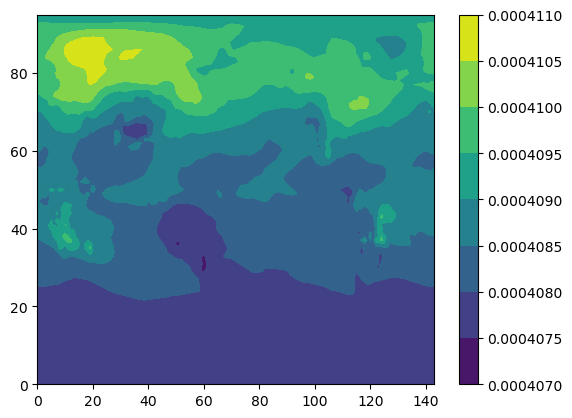

In [38]:
plt.contourf(co2_norm_1.isel(time=-1))
plt.colorbar()

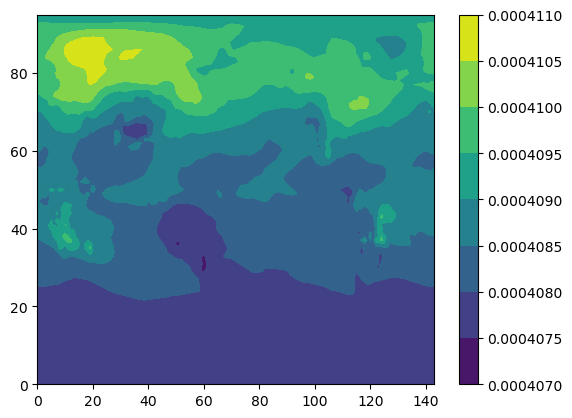

In [39]:
plt.contourf(co2_norm_1.isel(time=-1))
plt.colorbar()

In [40]:
coord_co2['gw']

<xarray.DataArray 'gw' (lat: 96)>
[96 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:  latitude weights

In [41]:
%%time
import dask.array as da
co2_avg_1 = xr.DataArray(da.average(da.average(co2_norm_1, axis=1, weights=coord_co2['gw']), axis=1)).squeeze().compute()
co2_avg_2 = xr.DataArray(da.average(da.average(co2_norm_2, axis=1, weights=coord_co2['gw']), axis=1)).squeeze().compute()

/home/guido/miniforge3/lib/python3.10/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 19.09 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/home/guido/miniforge3/lib/python3.10/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 61.28 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


CPU times: user 141 ms, sys: 66.6 ms, total: 207 ms
Wall time: 2.21 s


In [42]:
co2ppmv_1 = co2_avg_1 * (1.0e6 * 28.966 / 44.01)
co2ppmv_2 = co2_avg_2 * (1.0e6 * 28.966 / 44.01)

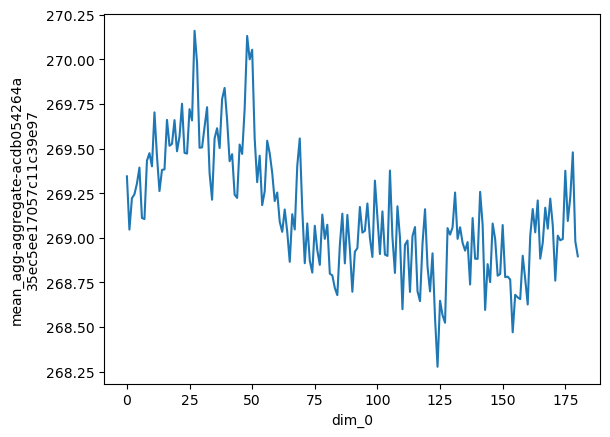

In [43]:
co2ppmv_1.plot()

In [44]:
co2ppmv_output_1 = pd.Series.to_xarray(pd.Series(co2ppmv_1.values, index=estco2_ann['time'], name='co2ppmv'))
co2ppmv_output_2 = pd.Series.to_xarray(pd.Series(co2ppmv_2.values, index=noestco2_ann['time'], name='co2ppmv'))

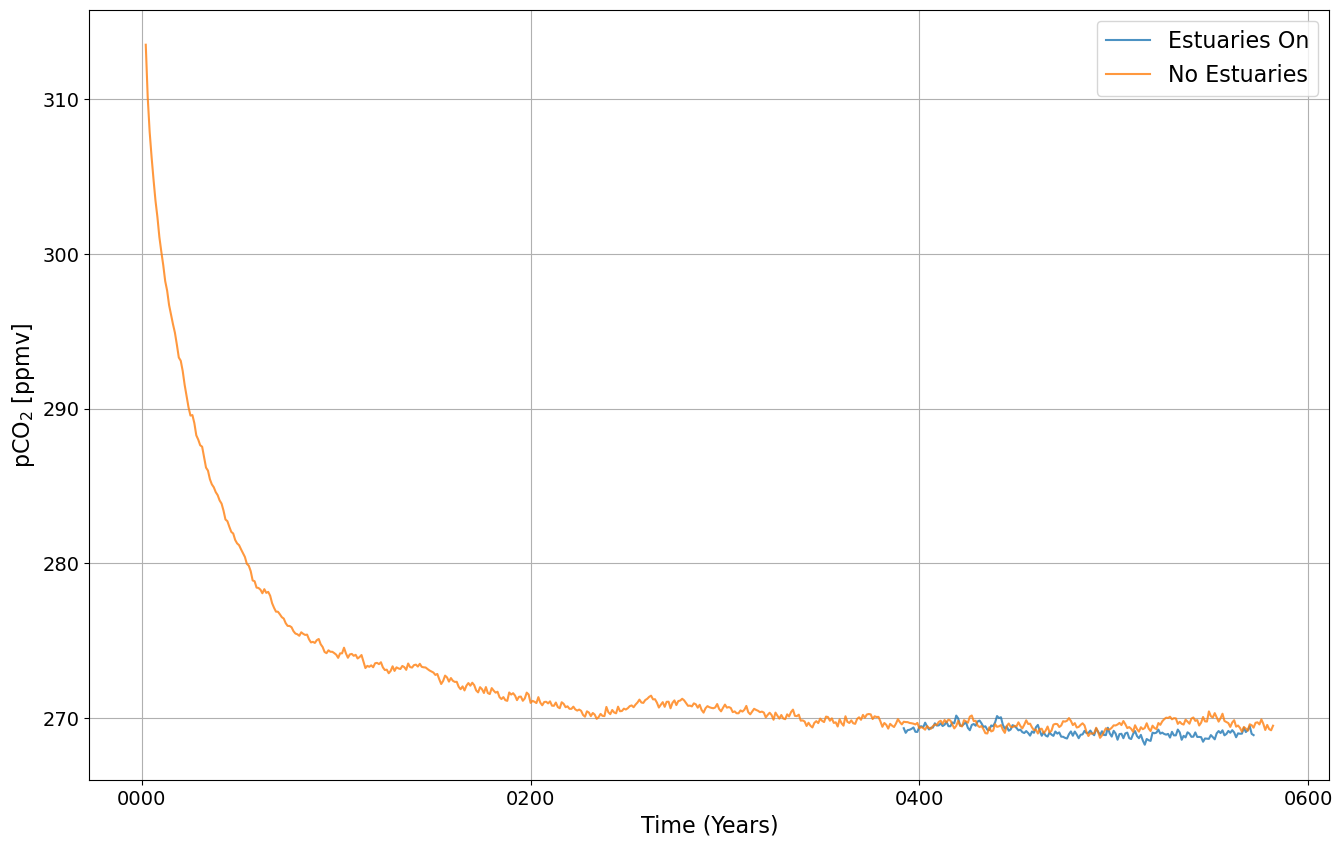

In [45]:
fig = plt.figure(figsize=(16,10))
ax = plt.subplot(111)
co2ppmv_output_1.plot(ax = ax, alpha=0.8, label="Estuaries On")
co2ppmv_output_2.plot(ax = ax, alpha=0.8, label="No Estuaries")
ax.set_xlabel("Time (Years)", size=16)
ax.set_ylabel("pCO$_2$ [ppmv]", size=16)
setaxesfsize(ax,14)
plt.legend(fontsize=16)
plt.grid()

In [46]:
#mocdata_noest_max_where, mocdata_noest_max_ind = get_amoc_max_where(mocdata_noest)

In [47]:
## look a AMOC Max which occurs at roughly 36N 
def get_amoc_max_36N(mocarray):
    latmin=35.
    latmax=37.
    zmin=50000.
    zmax=200000.
    region = 1
    moc_max_em = (mocarray
               .sel(transport_reg=region, moc_comp=0, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_ei = (mocarray
               .sel(transport_reg=region, moc_comp=1, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_sm = (mocarray
               .sel(transport_reg=region, moc_comp=2, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max = (moc_max_em +  moc_max_ei +  moc_max_sm).max(dim=('lat_aux_grid', 'moc_z'))
 
    return moc_max


In [48]:
def get_aabw_max_26S(mocarray):
    latmin=-28.
    latmax=-26.
    zmin=300000.
    zmax=500000.
    region = 0
    moc_max_em = (mocarray
               .sel(transport_reg=region, moc_comp=0, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_ei = (mocarray
               .sel(transport_reg=region, moc_comp=1, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_sm = (mocarray
               .sel(transport_reg=region, moc_comp=2, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max = (moc_max_em +  moc_max_ei +  moc_max_sm).min(dim=('lat_aux_grid', 'moc_z'))
 
    return moc_max


In [49]:
mocdata_gebm_max_36N = get_amoc_max_36N(gebm_annavg_spin_MOC)
mocdata_gnoebm_max_36N = get_amoc_max_36N(gnoebm_annavg_spin_MOC)
aabwdata_gebm_max_26S = get_aabw_max_26S(gebm_annavg_spin_MOC)
aabwdata_gnoebm_max_26S = get_aabw_max_26S(gnoebm_annavg_spin_MOC)



In [50]:
mocdata_gebm_max_20N = get_amoc_max_20N(gebm_annavg_spin_MOC)
mocdata_gnoebm_max_20N = get_amoc_max_20N(gnoebm_annavg_spin_MOC)



In [51]:
mocdata_gebm_max_26N = get_amoc_max_26N(gebm_annavg_spin_MOC)
mocdata_gnoebm_max_26N = get_amoc_max_26N(gnoebm_annavg_spin_MOC)


In [52]:
mocdata_bebm1_max_36N = get_amoc_max_36N(bebm1_annavg_spin_MOC)
mocdata_bebm2_max_36N = get_amoc_max_36N(bebm2_annavg_spin_MOC)
mocdata_bnoebm_max_36N = get_amoc_max_36N(bnoebm_annavg_spin_MOC)
aabwdata_bebm1_max_26S = get_aabw_max_26S(bebm1_annavg_spin_MOC)
aabwdata_bebm2_max_26S = get_aabw_max_26S(bebm2_annavg_spin_MOC)
aabwdata_bnoebm_max_26S = get_aabw_max_26S(bnoebm_annavg_spin_MOC)

In [53]:
mocdata_bebm1_max_20N = get_amoc_max_20N(bebm1_annavg_spin_MOC)
mocdata_bebm2_max_20N = get_amoc_max_20N(bebm2_annavg_spin_MOC)
mocdata_bnoebm_max_20N = get_amoc_max_20N(bnoebm_annavg_spin_MOC)


In [54]:
mocdata_bebm1_max_26N = get_amoc_max_26N(bebm1_annavg_spin_MOC)
mocdata_bebm2_max_26N = get_amoc_max_26N(bebm2_annavg_spin_MOC)
mocdata_bnoebm_max_26N = get_amoc_max_26N(bnoebm_annavg_spin_MOC)


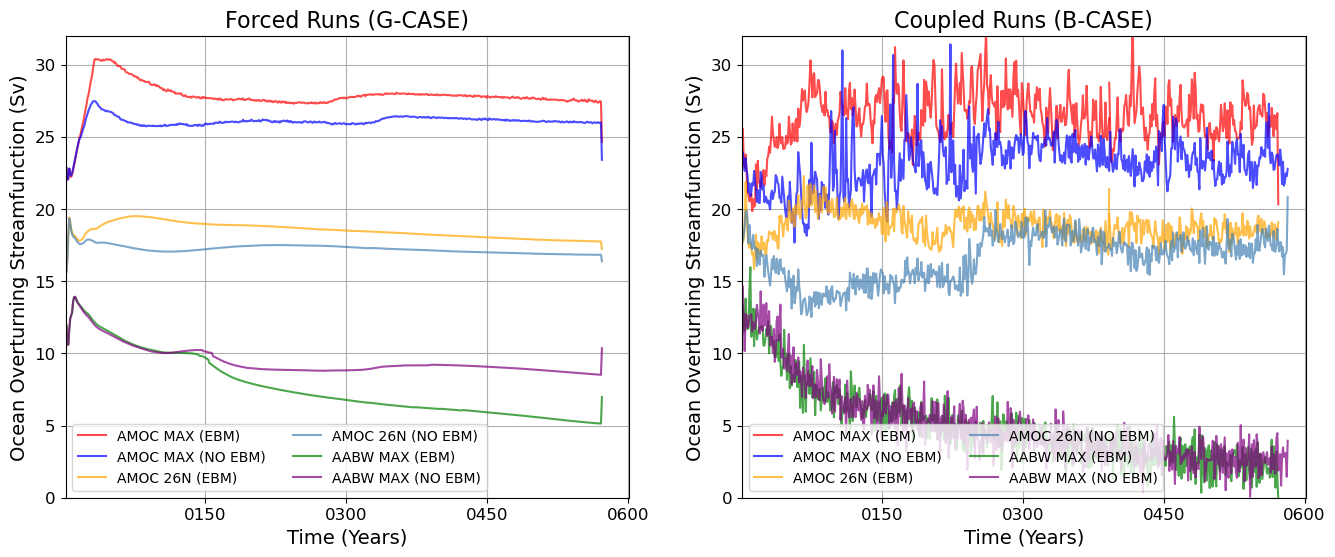

In [55]:
fig = plt.figure(figsize=(16,6))

ax0 = plt.subplot(121)
ax1 = plt.subplot(122)

amocmaxebmcol = "red"
amocmaxnoebmcol = "blue"
amoc26nebmcol = "orange"
amoc26nnoebmcol = "steelblue"
aabwmaxebmcol = "green"
aabwmaxnoebmcol = "purple"

legfs = 10 # leg size
axlbfs = 14 # axes labels size
tfs = 16 # title size
#tmin = 0
#tmax = 219000+365
#tunit = 'days since 0001-01-01 00:00:00'
#xmin = cftime.num2date(tmin, tunit)
#xmax = cftime.num2date(tmax, tunit)
xmin = cftime.num2date(0*365, 'days since 0001-01-01 00:00:00', calendar='noleap')
xmax = cftime.num2date(600*365, 'days since 0001-01-01 00:00:00', calendar='noleap')

#xmin = cftime.datetime("0000-01-01 00:00:00", calendar='no_leap')
mocdata_gebm_max_36N.MOC.plot(ax = ax0, label='AMOC MAX (EBM)', color=amocmaxebmcol, alpha=0.7)
mocdata_gnoebm_max_36N.MOC.plot(ax = ax0, label='AMOC MAX (NO EBM)', color=amocmaxnoebmcol, alpha=0.7)
mocdata_gebm_max_26N.MOC.plot(ax = ax0, label='AMOC 26N (EBM)', color=amoc26nebmcol, alpha=0.7)
mocdata_gnoebm_max_26N.MOC.plot(ax = ax0, label='AMOC 26N (NO EBM)', color=amoc26nnoebmcol, alpha=0.7)
(-aabwdata_gebm_max_26S.MOC).plot(ax = ax0, label='AABW MAX (EBM)', color=aabwmaxebmcol, alpha=0.7)
(-aabwdata_gnoebm_max_26S.MOC).plot(ax = ax0, label='AABW MAX (NO EBM)', color=aabwmaxnoebmcol, alpha=0.7)
ax0.set_ylim(0,32)
ax0.set_xlim(xmin,xmax)
ax0.legend(ncol=2, loc=3, fontsize=legfs)
ax0.grid()
setaxesfsize(ax0,12)
ax0.set_title("Forced Runs (G-CASE)", size=tfs)
ax0.set_ylabel("Ocean Overturning Streamfunction (Sv)", size=axlbfs)
ax0.set_xlabel("Time (Years)", size=axlbfs)
#ax0.set_xticks([0*365,200*365,400*365,600*365])
#ax0.set_xticklabels(['0', '200', '400', '600'])
#ax0.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

mocdata_bebm1_max_36N.MOC.plot(ax = ax1, color=amocmaxebmcol, alpha=0.7)
mocdata_bebm2_max_36N.MOC.plot(ax = ax1, label='AMOC MAX (EBM)', color=amocmaxebmcol, alpha=0.7)
mocdata_bnoebm_max_36N.MOC.plot(ax = ax1, label='AMOC MAX (NO EBM)', color=amocmaxnoebmcol, alpha=0.7)
mocdata_bebm1_max_26N.MOC.plot(ax = ax1, color=amoc26nebmcol, alpha=0.7)
mocdata_bebm2_max_26N.MOC.plot(ax = ax1, label='AMOC 26N (EBM)', color=amoc26nebmcol, alpha=0.7)
mocdata_bnoebm_max_26N.MOC.plot(ax = ax1, label='AMOC 26N (NO EBM)', color=amoc26nnoebmcol, alpha=0.7)
(-aabwdata_bebm1_max_26S.MOC).plot(ax = ax1, color=aabwmaxebmcol, alpha=0.7)
(-aabwdata_bebm2_max_26S.MOC).plot(ax = ax1, label='AABW MAX (EBM)', color=aabwmaxebmcol, alpha=0.7)
(-aabwdata_bnoebm_max_26S.MOC).plot(ax = ax1, label='AABW MAX (NO EBM)', color=aabwmaxnoebmcol, alpha=0.7)
ax1.set_ylim(0,32)
ax1.set_xlim(xmin,xmax)
ax1.legend(ncol=2, loc=3, fontsize=legfs)
ax1.grid()
setaxesfsize(ax1,12)
ax1.set_title("Coupled Runs (B-CASE)", size=tfs)
ax1.set_ylabel("Ocean Overturning Streamfunction (Sv)", size=axlbfs)
ax1.set_xlabel("Time (Years)", size=axlbfs)

icepaperdir="/home/guido/Dropbox/plots/estuaries/"
saveplot=False
if saveplot:
    plt.savefig(icepaperdir+"Figure1_MOC_spinup.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
    plt.savefig(icepaperdir+"Figure1_MOC_spinup.pdf", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)


In [56]:
woa_salt = xr.open_dataset("obsdata/PHC2_SALT_gx1v6_ann_avg.nc", engine="netcdf4")

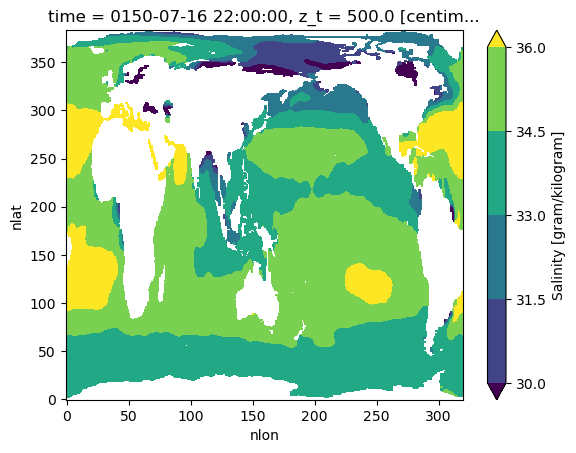

In [57]:
woa_salt.SALT.isel(z_t=0).plot(levels=np.linspace(30,36,5))

In [58]:
woa_salt

<xarray.Dataset>
Dimensions:  (time: 1, z_t: 60, nlat: 384, nlon: 320)
Coordinates:
    TLAT     (nlat, nlon) float32 ...
    TLONG    (nlat, nlon) float32 ...
  * time     (time) object 0150-07-16 22:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    SALT     (time, z_t, nlat, nlon) float32 ...
Attributes:
    title:                     c.b12.002
    history:                   Wed Apr 22 17:04:25 2009: ncra PHC2_SALT_gx1v6...
    conventions:               CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netc...
    contents:                  Diagnostic and Prognostic Variables
    source:                    CCSM POP2, the CCSM Ocean Component
    revision:                  $Id: tavg.F90 14725 2009-03-04 22:50:06Z njn01 $
    calendar:                  All years have exactly  365 days.
    start_time:                This dataset was created on 2009-04-07 at 06:0...
    cell_methods:              cell_methods = time: mean ==> the variable val...
    nsteps_total:              1360375
    tavg_sum:                  2678400.0
    nco_openmp_thread_number:  1

In [125]:
tarea_f = xr.open_dataset("/mdata/climo/B1850_BPRP_f19_g17_ref/ocn/B1850_BPRP_f19_g17_ref_ANN_051912_056911_climo.nc", engine="netcdf4").squeeze()
tarea = tarea_f.TAREA.where(woa_salt.SALT.isel(z_t=0).squeeze() > 0, np.nan)

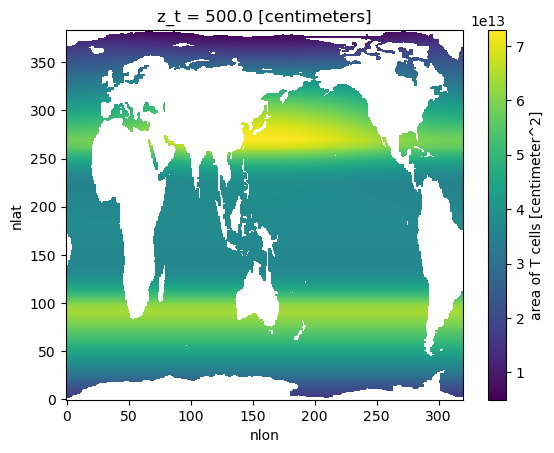

In [128]:
tarea.plot()

In [129]:
tareasum = tarea.sum(dim=("nlat","nlon")).compute()

In [130]:
tareasum

<xarray.DataArray 'TAREA' ()>
array(3.60607112e+18)
Coordinates:
    z_t      float32 500.0

In [131]:
woa_sss_mean = ((woa_salt.SALT.isel(z_t=0).squeeze()*tarea).sum(dim=("nlat","nlon"))/tareasum).compute()

In [132]:
woa_sss_mean

<xarray.DataArray ()>
array(34.63117077)
Coordinates:
    time     object 0150-07-16 22:00:00
    z_t      float32 500.0

In [133]:
woa_salt.SALT.isel(z_t=0).mean()

<xarray.DataArray 'SALT' ()>
array(34.44675, dtype=float32)
Coordinates:
    z_t      float32 500.0

In [134]:
# get the SSS

basedir = "/mdata/pproc/"

gcase_ebm = "g1850ecoctrl1deg"
gcase_noebm = "g1850econoest1deg"

chunksize=120
#gebm_spin_SSS = xrspinloader(basedir, gcase_ebm, "ocn", "SALT", chunksize).isel(z_t=0)
#gnoebm_spin_SSS = xrspinloader(basedir, gcase_noebm, "ocn", "SALT", chunksize).isel(z_t=0)

bcase_ebm1 = "B1850_BPRP_f19_g17_prod"
bcase_ebm2 = "B1850_BPRP_f19_g17_ref"
bcase_noebm = "B1850_BPRP_f19_g17_noest"

#bebm1_spin_SSS = xrspinloader(basedir, bcase_ebm1, "ocn", "SALT", chunksize).isel(z_t=0)
#bebm2_spin_SSS = xrspinloader(basedir, bcase_ebm2, "ocn", "SALT", chunksize).isel(z_t=0)
#bnoebm_spin_SSS = xrspinloader(basedir, bcase_noebm, "ocn", "SALT", chunksize).isel(z_t=0)

gebm_spin_SSS_ann = xrannloader("/mdata/pproc/g1850ecoctrl1deg/ocn/spin/g1850ecoctrl1deg_ocn_SALT_spinup_ANN.nc").isel(z_t=0)
gnoebm_spin_SSS_ann = xrannloader("/mdata/pproc/g1850econoest1deg/ocn/spin/g1850econoest1deg_ocn_SALT_spinup_ANN.nc").isel(z_t=0)
bebm1_spin_SSS_ann = xrannloader("/mdata/pproc/B1850_BPRP_f19_g17_prod/ocn/spin/B1850_BPRP_f19_g17_prod_ocn_SALT_spinup_ANN.nc").isel(z_t=0)
bebm2_spin_SSS_ann = xrannloader("/mdata/pproc/B1850_BPRP_f19_g17_ref/ocn/spin/B1850_BPRP_f19_g17_ref_ocn_SALT_spinup_ANN.nc").isel(z_t=0)
bnoebm_spin_SSS_ann = xrannloader("/mdata/pproc/B1850_BPRP_f19_g17_noest/ocn/spin/B1850_BPRP_f19_g17_noest_ocn_SALT_spinup_ANN.nc").isel(z_t=0)



In [135]:
gebm_spin_SSS_ann

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 571)
Coordinates:
    z_t      float32 500.0
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
  * time     (time) object 0001-12-31 00:00:00 ... 0571-12-31 00:00:00
Dimensions without coordinates: nlat, nlon
Data variables:
    SALT     (time, nlat, nlon) float32 ...

In [136]:
volf = xr.open_dataset("/mdata/climo/B1850_BPRP_f19_g17_ref/ocn/B1850_BPRP_f19_g17_ref_ANN_051912_056911_climo.nc", engine="netcdf4").squeeze()


In [137]:
volf.SALT

<xarray.DataArray 'SALT' (z_t: 60, nlat: 384, nlon: 320)>
[7372800 values with dtype=float32]
Coordinates:
    time     object 0519-12-15 00:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Salinity
    units:         gram/kilogram
    grid_loc:      3111
    cell_methods:  time: mean within years time: mean over years

In [138]:
# need to do volume average here
# make sure we have the cell volumne for calculations
VOL = (volf.dz * volf.DXT * volf.DYT).compute()
KMT = volf.KMT.compute()

for j in range(len(KMT.nlat)):
    for i in range(len(KMT.nlon)):
        k = KMT.values[j, i].astype(int)
        VOL.values[k:, j, i] = 0.0

volf["VOL"] = VOL


volf.VOL.attrs["long_name"] = "volume of T cells"
volf.VOL.attrs["units"] = "centimeter^3"
volf.VOL.attrs["grid_loc"] = "3111"
salt = xrspinloader(basedir, gcase_ebm, "ocn", "SALT", chunksize)
volf['VOL'] = volf['VOL'].where(~volf.SALT.isnull(), np.nan)

/tmp/ipykernel_24886/845716020.py:8: RuntimeWarning: invalid value encountered in cast
  k = KMT.values[j, i].astype(int)


loading... /mdata/pproc//g1850ecoctrl1deg/ocn/spin/g1850ecoctrl1deg_ocn_SALT_spinup.nc


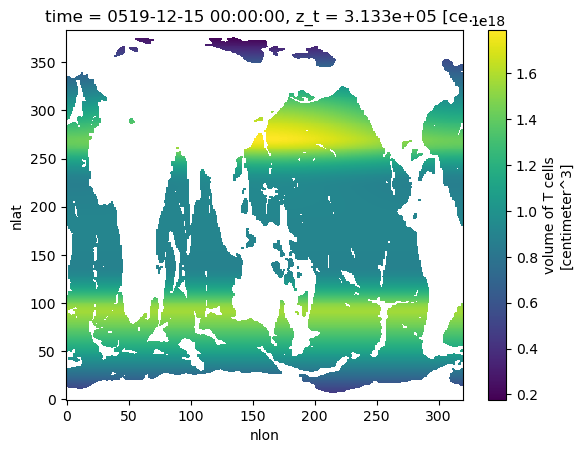

In [139]:
volf['VOL'].isel(z_t=50).plot()

In [140]:
volcube = volf["VOL"]

In [141]:
volsum = volf["VOL"].sum(dim=("nlat","nlon","z_t")).compute()

In [142]:
volsum

<xarray.DataArray 'VOL' ()>
array(1.32512143e+24)
Coordinates:
    time     object 0519-12-15 00:00:00

In [143]:
%%time
sss_gebm_mean = ((gebm_spin_SSS_ann*tarea).sum(dim=("nlat","nlon"))/tareasum).compute()
sss_gnoebm_mean = ((gnoebm_spin_SSS_ann*tarea).sum(dim=("nlat","nlon"))/tareasum).compute()

CPU times: user 941 ms, sys: 13.7 s, total: 14.7 s
Wall time: 1min 13s


In [144]:
%%time
sss_bebm1_mean = ((bebm1_spin_SSS_ann*tarea).sum(dim=("nlat","nlon"))/tareasum).compute()
sss_bebm2_mean = ((bebm2_spin_SSS_ann*tarea).sum(dim=("nlat","nlon"))/tareasum).compute()
sss_bnoebm_mean = ((bnoebm_spin_SSS_ann*tarea).sum(dim=("nlat","nlon"))/tareasum).compute()

CPU times: user 1.11 s, sys: 21.8 s, total: 22.9 s
Wall time: 1min 59s


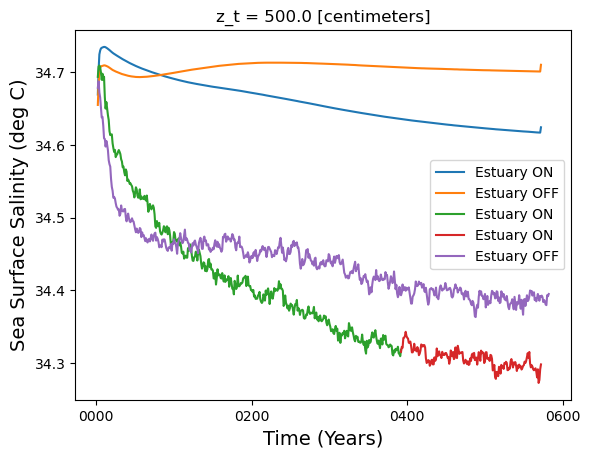

In [145]:
sss_gebm_mean.SALT.plot(label="Estuary ON")
sss_gnoebm_mean.SALT.plot(label="Estuary OFF")
sss_bebm1_mean.SALT.plot(label="Estuary ON")
sss_bebm2_mean.SALT.plot(label="Estuary ON")
sss_bnoebm_mean.SALT.plot(label="Estuary OFF")
plt.ylabel("Sea Surface Salinity (deg C)", size =14)
plt.xlabel("Time (Years)", size =14)

plt.legend()

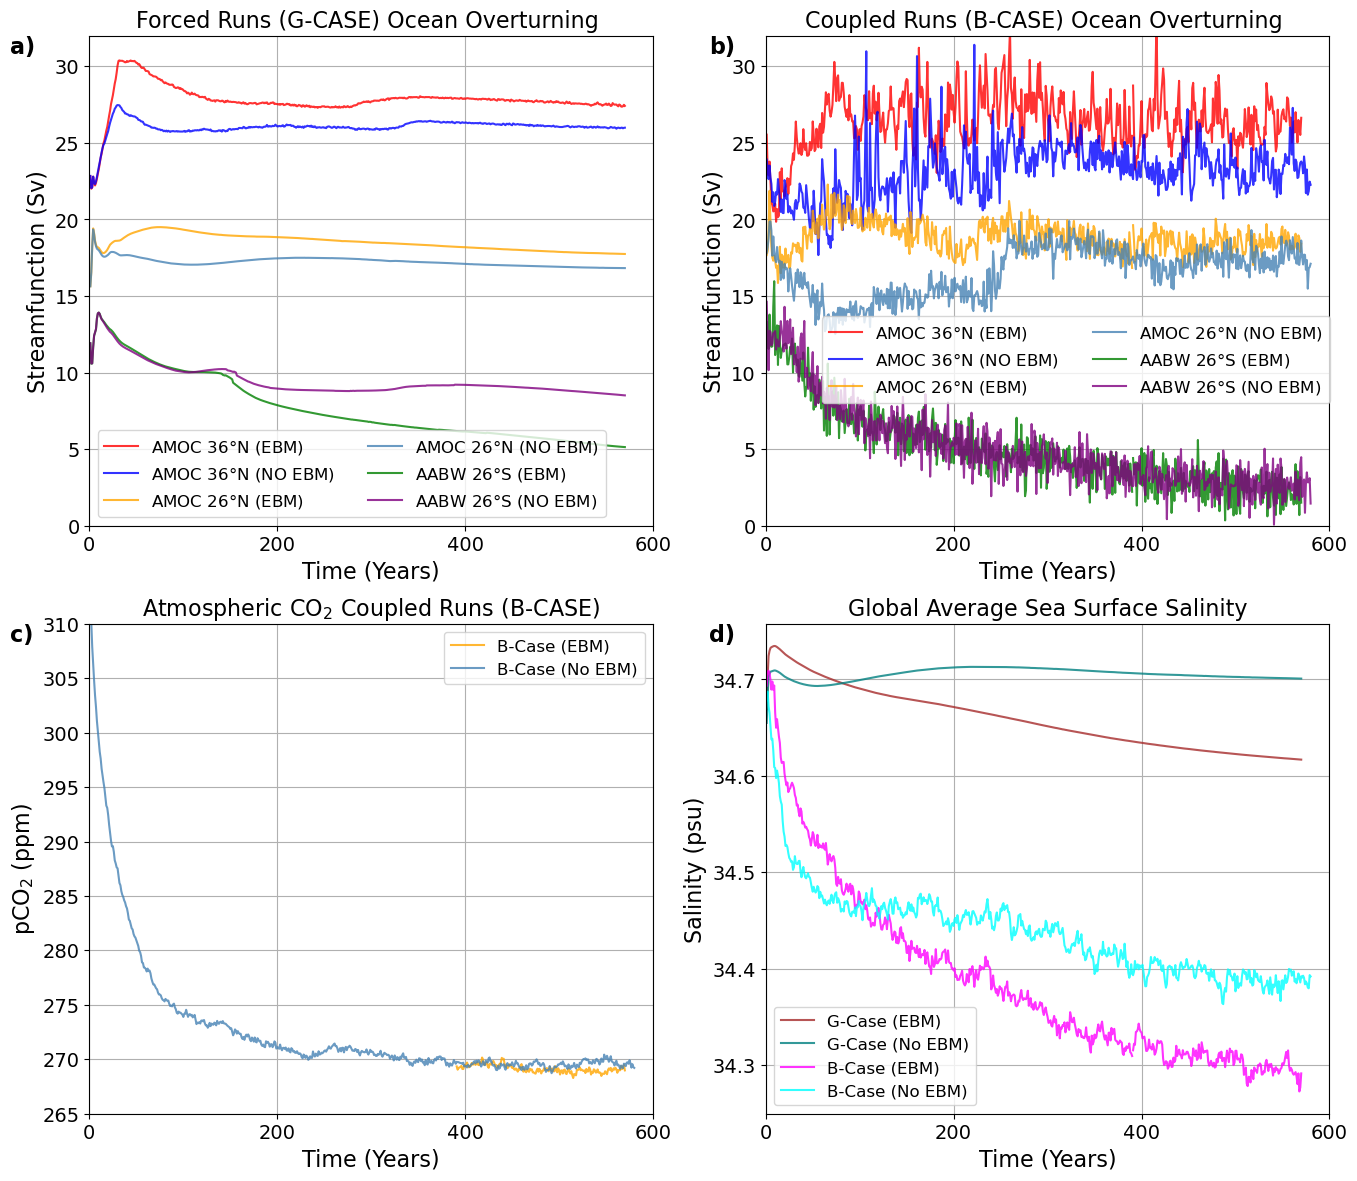

In [152]:
fig = plt.figure(figsize=(16,14))

ax0 = plt.subplot(221)
ax1 = plt.subplot(222)
ax2 = plt.subplot(223)
ax3 = plt.subplot(224)

def setxticks(ax):
    x0 = cftime.num2date(0*365, 'days since 0001-01-01 00:00:00', calendar='noleap')
    x1 = cftime.num2date(200*365, 'days since 0001-01-01 00:00:00', calendar='noleap')
    x2 = cftime.num2date(400*365, 'days since 0001-01-01 00:00:00', calendar='noleap')
    x3 = cftime.num2date(600*365, 'days since 0001-01-01 00:00:00', calendar='noleap')
    ax.set_xticks([x0,x1,x2,x3])
    ax.set_xticklabels(["0","200","400","600"])

lw = 1.5 # line width
lalp = 0.8 # line transperancy
axfs = 14 # axes font size 
axls = 16 # axes labels size
legfs = 12 # leg size
tfs = 16 # title size

xmin = cftime.num2date(0*365, 'days since 0001-01-01 00:00:00', calendar='noleap')
xmax = cftime.num2date(600*365, 'days since 0001-01-01 00:00:00', calendar='noleap')

# GCASE MOC
amocmaxebmcol = "red"
amocmaxnoebmcol = "blue"
amoc26nebmcol = "orange"
amoc26nnoebmcol = "steelblue"
aabwmaxebmcol = "green"
aabwmaxnoebmcol = "purple"

mocdata_gebm_max_36N.MOC[:-1].plot(ax = ax0, label='AMOC 36$\degree$N (EBM)', color=amocmaxebmcol, alpha=lalp, linewidth=lw)
mocdata_gnoebm_max_36N.MOC[:-1].plot(ax = ax0, label='AMOC 36$\degree$N (NO EBM)', color=amocmaxnoebmcol, alpha=lalp, linewidth=lw)
mocdata_gebm_max_26N.MOC[:-1].plot(ax = ax0, label='AMOC 26$\degree$N (EBM)', color=amoc26nebmcol, alpha=lalp, linewidth=lw)
mocdata_gnoebm_max_26N.MOC[:-1].plot(ax = ax0, label='AMOC 26$\degree$N (NO EBM)', color=amoc26nnoebmcol, alpha=lalp, linewidth=lw)
(-aabwdata_gebm_max_26S.MOC[:-1]).plot(ax = ax0, label='AABW 26$\degree$S (EBM)', color=aabwmaxebmcol, alpha=lalp, linewidth=lw)
(-aabwdata_gnoebm_max_26S.MOC[:-1]).plot(ax = ax0, label='AABW 26$\degree$S (NO EBM)', color=aabwmaxnoebmcol, alpha=lalp, linewidth=lw)
ax0.set_ylim(0,32)
ax0.set_xlim(xmin,xmax)
ax0.legend(ncol=2, loc=3, fontsize=legfs)
ax0.set_title("Forced Runs (G-CASE) Ocean Overturning ", size=tfs)
setaxeslsize(ax0, axfs, "Time (Years)", "Streamfunction (Sv)",  axls)
setxticks(ax0)
ax0.grid()


# BCASE MOC

mocdata_bebm1_max_36N.MOC[:-1].plot(ax = ax1, color=amocmaxebmcol, alpha=lalp, linewidth=lw)
mocdata_bebm2_max_36N.MOC[:-1].plot(ax = ax1, label='AMOC 36$\degree$N (EBM)', color=amocmaxebmcol, alpha=lalp, linewidth=lw)
mocdata_bnoebm_max_36N.MOC[:-1].plot(ax = ax1, label='AMOC 36$\degree$N (NO EBM)', color=amocmaxnoebmcol, alpha=lalp, linewidth=lw)
mocdata_bebm1_max_26N.MOC[:-1].plot(ax = ax1, color=amoc26nebmcol, alpha=lalp, linewidth=lw)
mocdata_bebm2_max_26N.MOC[:-1].plot(ax = ax1, label='AMOC 26$\degree$N (EBM)', color=amoc26nebmcol, alpha=lalp, linewidth=lw)
mocdata_bnoebm_max_26N.MOC[:-1].plot(ax = ax1, label='AMOC 26$\degree$N (NO EBM)', color=amoc26nnoebmcol, alpha=lalp, linewidth=lw)
(-aabwdata_bebm1_max_26S.MOC[:-1]).plot(ax = ax1, color=aabwmaxebmcol, alpha=lalp, linewidth=lw)
(-aabwdata_bebm2_max_26S.MOC[:-1]).plot(ax = ax1, label='AABW 26$\degree$S (EBM)', color=aabwmaxebmcol, alpha=lalp, linewidth=lw)
(-aabwdata_bnoebm_max_26S.MOC[:-1]).plot(ax = ax1, label='AABW 26$\degree$S (NO EBM)', color=aabwmaxnoebmcol, alpha=lalp, linewidth=lw)
ax1.set_ylim(0,32)
ax1.set_xlim(xmin,xmax)
ax1.legend(ncol=2, loc=(0.1,0.25), fontsize=legfs)
ax1.set_title("Coupled Runs (B-CASE) Ocean Overturning ", size=tfs)
setaxeslsize(ax1, axfs, "Time (Years)", "Streamfunction (Sv)",  axls)
setxticks(ax1)
ax1.grid()

# CO2

bonc = "orange"
boffc= "steelblue"

co2ppmv_output_1[:-1].plot(ax = ax2, label="B-Case (EBM)", color=bonc, alpha=lalp, linewidth=lw)
co2ppmv_output_2[:-1].plot(ax = ax2, label="B-Case (No EBM)", color=boffc, alpha=lalp, linewidth=lw)
ax2.set_xlabel("", size=16)
ax2.set_ylabel("", size=16)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(265,310)
ax2.legend(fontsize=16)
ax2.legend(ncol=1, loc=1, fontsize=legfs)
ax2.set_title("Atmospheric CO$_2$ Coupled Runs (B-CASE)", size=tfs)
setaxeslsize(ax2, axfs, "Time (Years)", "pCO$_2$ (ppm)",  axls)
setxticks(ax2)
ax2.grid()


# SSS

gonsss = "brown"
goffsss = "teal"
bonsss = "magenta"
boffsss= "cyan"

sss_gebm_mean.SALT[:-1].plot(ax = ax3, label="G-Case (EBM)", color=gonsss, alpha=lalp, linewidth=lw)
sss_gnoebm_mean.SALT[:-1].plot(ax = ax3, label="G-Case (No EBM)", color=goffsss, alpha=lalp, linewidth=lw)
sss_bebm1_mean.SALT[:-1].plot(ax = ax3, color=bonsss, alpha=lalp, linewidth=lw)
sss_bebm2_mean.SALT[:-1].plot(ax = ax3, label="B-Case (EBM)", color=bonsss, alpha=lalp, linewidth=lw)
sss_bnoebm_mean.SALT[:-1].plot(ax = ax3, label="B-Case (No EBM)", color=boffsss, alpha=lalp, linewidth=lw)
ax3.set_xlim(xmin,xmax)
#ax3.set_ylim(27.3,27.7)
setaxeslsize(ax3, axfs, "Time (Years)", "Salinity (psu)",  axls)
ax3.set_title("Global Average Sea Surface Salinity", size=tfs)
setxticks(ax3)
ax3.legend(ncol=1, loc=3, fontsize=legfs)
ax3.grid()


# figure labels (make it look like Nature)
lbfs=16
xl = -0.14
yl = 1.
ax0.text(xl, yl, "a)", ha='left', va='top', size=lbfs, weight='bold', transform=ax0.transAxes)
ax2.text(xl, yl, "c)", ha='left', va='top', size=lbfs, weight='bold', transform=ax2.transAxes)
xl = -0.1
ax1.text(xl, yl, "b)", ha='left', va='top', size=lbfs, weight='bold', transform=ax1.transAxes)
ax3.text(xl, yl, "d)", ha='left', va='top', size=lbfs, weight='bold', transform=ax3.transAxes)



icepaperdir="/home/guido/Dropbox/plots/estuaries/"
saveplot=False
if saveplot:
    plt.savefig(icepaperdir+"Figure1_MOC_CO2_SSS_spinup.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
    plt.savefig(icepaperdir+"Figure1_MOC_CO2_SSS_spinup.pdf", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
